### LGMVIP 

### DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

### Let's Grow More Internship Dec 22

### TASK 2 - STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM

In [1]:
# Importing the libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the dataset
df=pd.read_csv(r"C:\Users\Lenovo\Documents\LGMVIP Internship\NSE-TATAGLOBAL.csv",encoding = 'ISO-8859-1')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [58]:
training_set = df.iloc[:, 1:2].values

In [3]:
#converting date to Datatime format & sorting by Date
df.Date=pd.to_datetime(df.Date,dayfirst = True)
df=df.sort_values('Date',ascending=True)

In [4]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [5]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [6]:
df.size

16280

In [7]:
df.shape

(2035, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 143.1 KB


In [9]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [10]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [11]:
df.nunique()

Date                    2035
Open                    1165
High                    1257
Low                     1263
Last                    1268
Close                   1313
Total Trade Quantity    2034
Turnover (Lacs)         2030
dtype: int64

In [12]:
df.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


<AxesSubplot:>

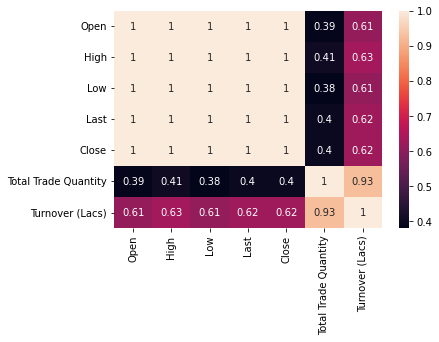

In [13]:
sns.heatmap(df.corr(),annot=True)

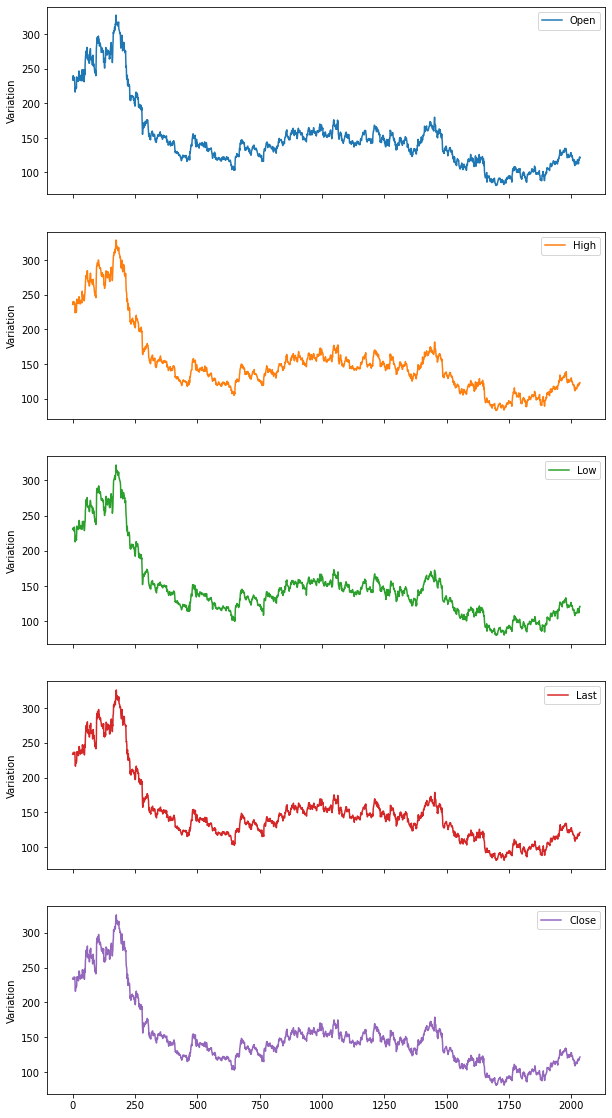

In [14]:
cols_plot=['Open','High','Low','Last','Close']
axes = df[cols_plot].plot(alpha = 1,figsize=(10,20),subplots = True)

for i in axes:
    i.set_ylabel('Variation')

In [15]:
df.columns 

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [16]:
df1=df.reset_index()['Close'] #CREATING TARGET VARIABLE

In [17]:
df1.head()

0    121.55
1    120.90
2    120.65
3    117.60
4    118.65
Name: Close, dtype: float64

In [18]:
df1.tail()

2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, dtype: float64

In [19]:
df.dtypes

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity             int64
Turnover (Lacs)                float64
dtype: object

In [20]:
#VISUALS

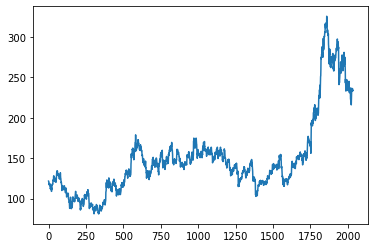

In [21]:
plt.plot(df1)

In [96]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.16626115],
       [0.15896188],
       [0.16504461],
       ...,
       [0.64436334],
       [0.62226277],
       [0.6202352 ]])

In [97]:

df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [61]:
#Training & Testing 
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1):1]

In [98]:
training_size,test_size

(1322, 713)

In [99]:
#converting an array values into dataset matrix

In [100]:
def Create_dataset(dataset,time_step=1):
    dataX,dataY= [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
        
    return np.array(dataX),np.array(dataY)

In [101]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step=100

X_train,y_train= Create_dataset(train_data,time_step)
X_test,y_test= Create_dataset (test_data,time_step)

In [102]:
print(X_train)

[[0.16584967 0.16319444 0.1621732  ... 0.14011438 0.13848039 0.12479575]
 [0.16319444 0.1621732  0.14971405 ... 0.13848039 0.12479575 0.12254902]
 [0.1621732  0.14971405 0.15400327 ... 0.12479575 0.12254902 0.13010621]
 ...
 [0.19669118 0.19505719 0.20996732 ... 0.20751634 0.20751634 0.19219771]
 [0.19505719 0.20996732 0.21098856 ... 0.20751634 0.19219771 0.18341503]
 [0.20996732 0.21098856 0.21568627 ... 0.19219771 0.18341503 0.19546569]]


In [103]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.16584967],
        [0.16319444],
        [0.1621732 ],
        ...,
        [0.14011438],
        [0.13848039],
        [0.12479575]],

       [[0.16319444],
        [0.1621732 ],
        [0.14971405],
        ...,
        [0.13848039],
        [0.12479575],
        [0.12254902]],

       [[0.1621732 ],
        [0.14971405],
        [0.15400327],
        ...,
        [0.12479575],
        [0.12254902],
        [0.13010621]],

       ...,

       [[0.19669118],
        [0.19505719],
        [0.20996732],
        ...,
        [0.20751634],
        [0.20751634],
        [0.19219771]],

       [[0.19505719],
        [0.20996732],
        [0.21098856],
        ...,
        [0.20751634],
        [0.19219771],
        [0.18341503]],

       [[0.20996732],
        [0.21098856],
        [0.21568627],
        ...,
        [0.19219771],
        [0.18341503],
        [0.19546569]]])

In [31]:
print(X_test.shape),print(y_test.shape)

(612, 100)
(612,)


(None, None)

In [104]:
#reshape input (samples,timestep,f eatures) required for LSTM Model
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [105]:
###creating LSTM Model

In [106]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [107]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [108]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [109]:
# create the Stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [42]:
#Adding LSTM layers and some dropouts

In [110]:
model = Sequential()

model.add (LSTM(units=50,return_sequences =True,input_shape=(100,1)))
model.add(Dropout(0.2))


model.add (LSTM(units=50,return_sequences =True))
model.add(Dropout(0.2))

model.add (LSTM(units=50,return_sequences =True))
model.add(Dropout(0.2))

model.add (LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer = 'adam',loss='mean_squared_error')

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
39/39 [==============================] - 20s 188ms/step - loss: 0.0076 - val_loss: 0.0055
Epoch 2/50
39/39 [==============================] - 6s 147ms/step - loss: 0.0016 - val_loss: 0.0062
Epoch 3/50
39/39 [==============================] - 5s 132ms/step - loss: 0.0015 - val_loss: 0.0043
Epoch 4/50
39/39 [==============================] - 5s 135ms/step - loss: 0.0014 - val_loss: 0.0083
Epoch 5/50
39/39 [==============================] - 6s 143ms/step - loss: 0.0013 - val_loss: 0.0053
Epoch 6/50
39/39 [==============================] - 5s 130ms/step - loss: 0.0014 - val_loss: 0.0054
Epoch 7/50
39/39 [==============================] - 5s 137ms/step - loss: 0.0012 - val_loss: 0.0105
Epoch 8/50
39/39 [==============================] - 5s 134ms/step - loss: 0.0012 - val_loss: 0.0083
Epoch 9/50
39/39 [==============================] - 5s 137ms/step - loss: 0.0011 - val_loss: 0.0071
Epoch 10/50
39/39 [==============================] - 5s 132ms/step - loss: 0.0012 - val_loss: 0.009

In [112]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_9 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_10 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_11 (LSTM)              (None, 50)               

In [113]:
#lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

20/20 [==============================] - 1s 43ms/step


In [114]:
# transformback to original for
train_predict=Sc.inverse_transform(train_predict)
test_predict=Sc.inverse_transform(test_predict)

In [115]:
#calculate RMSE performance metrics 
import math
from sklearn.metrics import mean_squared_error 
math.sqrt(mean_squared_error(y_train,train_predict))

135.25859184132986

In [116]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

193.27931513129522

<function matplotlib.pyplot.show(close=None, block=None)>

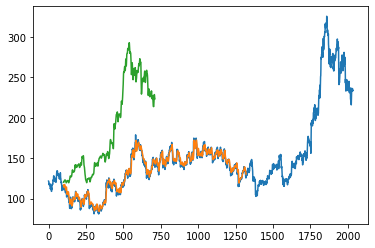

In [119]:
#plotting 
#shift train prediction for plotting 
look_back=100
trainPredictplot = np.empty_like(df1)
trainPredictplot[:,:] = np.nan
trainPredictplot[look_back:len(train_predict)+look_back,:]=train_predict
#shift test prediction for plotting 
look_back=100
testPredictplot = np.empty_like(df1)
testPredictplot[:,:] = np.nan
testPredictplot[look_back:len(test_predict)+look_back,:]=test_predict
#plot baseline and predictions
plt.plot(Sc.inverse_transform(df1))
plt.plot(trainPredictplot)
plt.plot(testPredictplot)
plt.show

In [120]:
len(test_data)

713

In [121]:
X_input=test_data[613:].reshape(1,-1)
X_input.shape

(1, 100)

In [122]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [123]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [124]:
# Demonstrate prediction for next days
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        X_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input = X_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(X_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_input = X_input.reshape((1, n_steps,1))
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5814085]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

8 day output [[0.5004574]]
9 day input [0.66421569 0.67892157 0.69138072 0.70894608 0.72263072 0.73406863
 0.72120098 0.74979575 0.7689951  0.74468954 0.7120098  0.74673203
 0.75490196 0.76041667 0.75980392 0.74652778 0.76245915 0.77062908
 0.80412582 0.78104575 0.79411765 0.76021242 0.73488562 0.72406046
 0.73999183 0.74979575 0.76143791 0.75428922 0.74754902 0.76960784
 0.7495915  0.81719771 0.80208333 0.77736928 0.75714869 0.79370915
 0.79166667 0.77144608 0.75265523 0.72691993 0.6629902  0.68198529
 0.64419935 0.62152778 0.6439951  0.66319444 0.67544935 0.63705065
 0.64603758 0.65890523 0.65870098 0.67790033 0.63194444 0.63112745
 0.62785948 0.64767157 0.63991013 0.63480392 0.63868464 0.62336601
 0.62745098 0.63970588 0.64705882 0.66196895 0.67075163 0.65196078
 0.63112745 0.61294935 0.6376634  0.62254902 0.62745098 0.63337418
 0.62642974 0.63623366 0.58312908 0.57781863 0.57230392 0.58006536
 0.57618464 0.55167484 0.57883987 0.625      0.63582516 0.62949346
 0.62888072 0.62765523 

16 day output [[0.46803674]]
17 day input [0.7689951  0.74468954 0.7120098  0.74673203 0.75490196 0.76041667
 0.75980392 0.74652778 0.76245915 0.77062908 0.80412582 0.78104575
 0.79411765 0.76021242 0.73488562 0.72406046 0.73999183 0.74979575
 0.76143791 0.75428922 0.74754902 0.76960784 0.7495915  0.81719771
 0.80208333 0.77736928 0.75714869 0.79370915 0.79166667 0.77144608
 0.75265523 0.72691993 0.6629902  0.68198529 0.64419935 0.62152778
 0.6439951  0.66319444 0.67544935 0.63705065 0.64603758 0.65890523
 0.65870098 0.67790033 0.63194444 0.63112745 0.62785948 0.64767157
 0.63991013 0.63480392 0.63868464 0.62336601 0.62745098 0.63970588
 0.64705882 0.66196895 0.67075163 0.65196078 0.63112745 0.61294935
 0.6376634  0.62254902 0.62745098 0.63337418 0.62642974 0.63623366
 0.58312908 0.57781863 0.57230392 0.58006536 0.57618464 0.55167484
 0.57883987 0.625      0.63582516 0.62949346 0.62888072 0.62765523
 0.62234477 0.63378268 0.62622549 0.62214052 0.62418301 0.5814085
 0.5726943  0.5584906

25 day output [[0.43233076]]
26 day input [0.77062908 0.80412582 0.78104575 0.79411765 0.76021242 0.73488562
 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922 0.74754902
 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928 0.75714869
 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993 0.6629902
 0.68198529 0.64419935 0.62152778 0.6439951  0.66319444 0.67544935
 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033 0.63194444
 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392 0.63868464
 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895 0.67075163
 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902 0.62745098
 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863 0.57230392
 0.58006536 0.57618464 0.55167484 0.57883987 0.625      0.63582516
 0.62949346 0.62888072 0.62765523 0.62234477 0.63378268 0.62622549
 0.62214052 0.62418301 0.5814085  0.5726943  0.55849063 0.54364276
 0.53060752 0.52003086 0.51176691 0.50540531 0.50045741 0.49642679
 0.49285862 0.4893815

In [126]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [127]:
len(df1)

2035

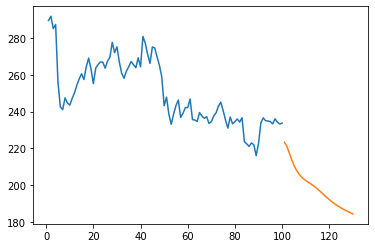

In [128]:
plt.plot(day_new,Sc.inverse_transform(df1[1935:]))
plt.plot(day_pred,Sc.inverse_transform(lst_output))

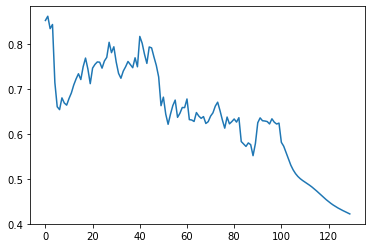

In [129]:
df2=df1.tolist()
df2.extend(lst_output)
plt.plot(df2[1935:])

In [130]:
df2=Sc.inverse_transform(df2).tolist()

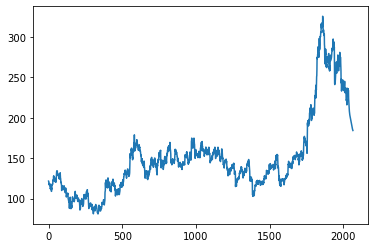

In [131]:
plt.plot(df2)

### THANK YOU!!!